In [15]:
# Elle Nguyen - CIS 3715 - Section 02
# Lab 6 - Clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import normalized_mutual_info_score

df = pd.read_csv('heart.csv')

In [16]:
# Task 2.1 - Preprocess the raw data

# Check whether there are missing values
print(df.isnull().sum())
print("\nThere are no missing values in this dataset.\n")

# Check whether there are categorical features
print(df.info())
print("\nThere are no categorical features in this dataset.\n")

# Normalize the feature
X,y = df.drop(columns=['target']).to_numpy(),df.target.to_numpy()

normalizer = StandardScaler()
X = normalizer.fit_transform(heartData)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64

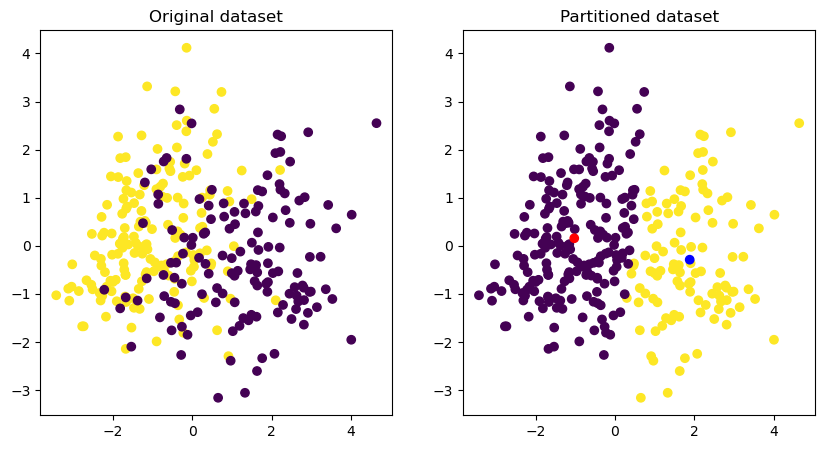

The normalized mutual information score of the K-means method is 0.3043


In [17]:
# Task 2.2 - Partition the dataset with K-means and compute its NMI

# Reduce the number of features into 2
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Partition the dataset with K-means
cluster = KMeans(n_clusters=2, random_state=0).fit(X_r)
centroids = cluster.cluster_centers_  #get the clustering centroids

# Visualization
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X_r[:, 0], X_r[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X_r[:, 0], X_r[:, 1], c=cluster.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])  #visualize the clustering centroids
plt.title('Partitioned dataset')

plt.show()

# Compute its NMI
nmi = normalized_mutual_info_score(cluster.labels_, df['target'], average_method='arithmetic')
print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

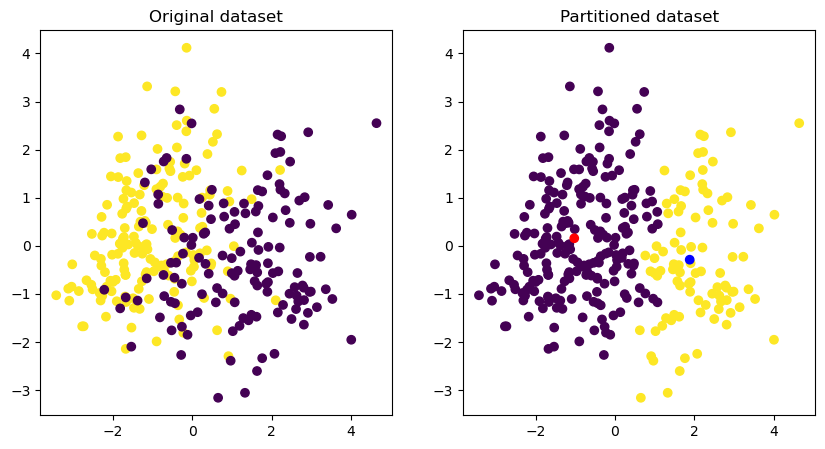

The normalized mutual information score of the Agglomerative method  is 0.3064


In [18]:
# Task 2.3 - Partition the dataset with Agglomerative method and compute its NMI

# Partition the dataset with reduced dimensionality
cluster = AgglomerativeClustering(n_clusters=2).fit(X_r)

# Visualization 
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X_r[:, 0], X_r[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X_r[:, 0], X_r[:, 1], c=cluster.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])  #visualize the clustering centroids
plt.title('Partitioned dataset')

plt.show()

# Compute its NMI
nmi = normalized_mutual_info_score(cluster.labels_, df['target'], average_method='arithmetic')
print('The normalized mutual information score of the Agglomerative method  is {:.4f}'.format(nmi))